## Importing libraries

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Importing the dataset as pandas
df = pd.read_csv('ecommerceDataset.csv')
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
df.head() # what the dataset looks like

,category,announcement
0,Books,17 Years' Chapterwise Solutions Physics JEE Ma...
1,Electronics,"Samsung Guru Music 2 (SM-B310E, Black) Colour:..."
2,Books,SSC Constable (GD) & Rifleman (GD) Online Exam...
3,Clothing & Accessories,Platinum Women's Cotton Dress Material (1001 R...
4,Books,"Runner's World Run Less, Run Faster: Become a ..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      50425 non-null  object
 1   announcement  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [5]:
df.describe()

,category,announcement
count,50425,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [6]:
df['category'].unique()

array(['Books', 'Electronics', 'Clothing & Accessories', 'Household'],
      dtype=object)

In [7]:
df.shape

(50425, 2)

In [8]:
df.isnull().sum()

category        0
announcement    1
dtype: int64

In [9]:
df.nunique()

category            4
announcement    27802
dtype: int64

## Dataset visualization

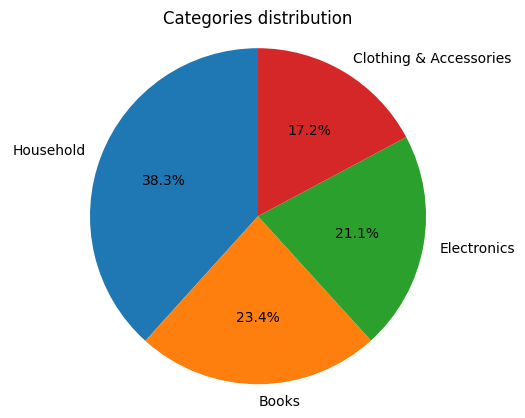

In [10]:
exploded_df = df.explode('category')
category_counts = exploded_df['category'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Categories distribution')
plt.axis('equal')
plt.show()

## Preparing label

In [11]:
df = df[:2000] # using just the first 2000 rows

labelEncoder = LabelEncoder()
df['category'] = labelEncoder.fit_transform(df['category'])

## Building the dataset

In [12]:
# fill nan values
df.fillna(method ='ffill', inplace = True)

C:\Users\blind\AppData\Local\Temp\ipykernel_11340\3396714780.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method ='ffill', inplace = True)


In [13]:
# calling the vectorizer to encode the announcements
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['announcement'])
y = df.drop(columns='announcement')
print(X.shape)

(2000, 19804)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the models

In [15]:
accuracy_array = []
algorithms_used = ['GaussianNB', 'Decision Tree', 'Random Forest', 'Logistic Regression']

Gaussian Naive Bayes

In [16]:
model = OneVsRestClassifier(GaussianNB())
model.fit(X_train.toarray(), y_train)

OneVsRestClassifier(estimator=GaussianNB())

In [17]:
y_pred = model.predict(X_test.toarray())

In [18]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_array.append(accuracy)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        83
           1       1.00      0.62      0.77        71
           2       0.93      0.72      0.81        90
           3       0.72      0.97      0.83       156

    accuracy                           0.83       400
   macro avg       0.90      0.79      0.82       400
weighted avg       0.86      0.83      0.83       400



In [19]:
confusion_matrix(y_test, y_pred)

array([[ 70,   0,   2,  11],
       [  0,  44,   1,  26],
       [  2,   0,  65,  23],
       [  2,   0,   2, 152]], dtype=int64)

Decision Tree

In [20]:
model = OneVsRestClassifier(DecisionTreeClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [21]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_array.append(accuracy)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.88      0.60      0.71        83
           1       0.96      0.69      0.80        71
           2       0.76      0.53      0.63        90
           3       0.65      0.96      0.77       156

    accuracy                           0.74       400
   macro avg       0.81      0.70      0.73       400
weighted avg       0.78      0.74      0.73       400



In [22]:
confusion_matrix(y_test, y_pred)

array([[ 50,   1,   5,  27],
       [  0,  49,   6,  16],
       [  4,   1,  48,  37],
       [  3,   0,   4, 149]], dtype=int64)

Random Forest

In [23]:
model = OneVsRestClassifier(RandomForestClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [24]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_array.append(accuracy)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        83
           1       0.96      0.90      0.93        71
           2       0.95      0.78      0.85        90
           3       0.89      0.92      0.91       156

    accuracy                           0.90       400
   macro avg       0.91      0.89      0.90       400
weighted avg       0.90      0.90      0.90       400



In [25]:
confusion_matrix(y_test, y_pred)

array([[ 81,   1,   1,   0],
       [  2,  64,   1,   4],
       [  6,   0,  70,  14],
       [  8,   2,   2, 144]], dtype=int64)

LogisticRegression

In [26]:
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [27]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_array.append(accuracy)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        83
           1       0.98      0.86      0.92        71
           2       0.96      0.77      0.85        90
           3       0.80      0.98      0.88       156

    accuracy                           0.89       400
   macro avg       0.93      0.87      0.89       400
weighted avg       0.90      0.89      0.89       400



In [28]:
confusion_matrix(y_test, y_pred)

array([[ 72,   1,   1,   9],
       [  1,  61,   0,   9],
       [  1,   0,  69,  20],
       [  1,   0,   2, 153]], dtype=int64)

<BarContainer object of 4 artists>

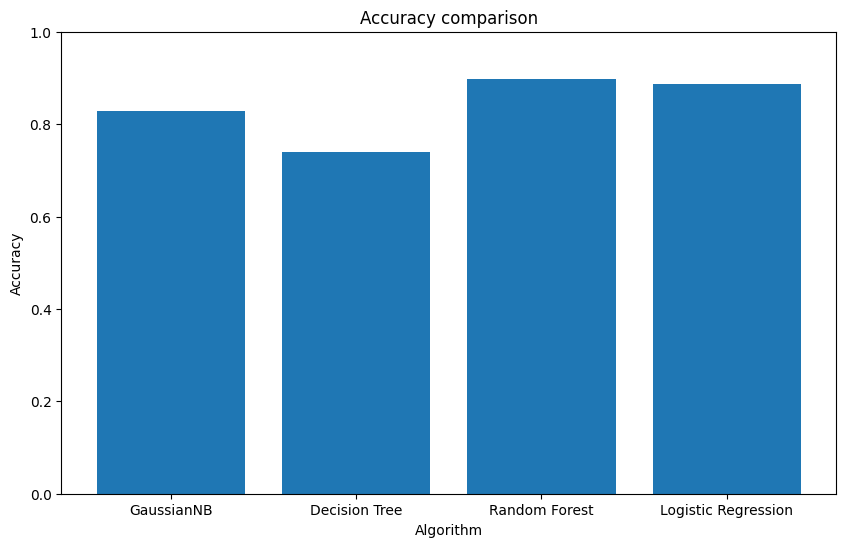

In [29]:
plt.figure(figsize=(10,6))
plt.title('Accuracy comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.bar(algorithms_used, accuracy_array)

## Model Algorithm Comparison by accuracy and training time

Those numbers are pulled after one execution of "Run All" button


- Gaussian Naive Bayes: 83% in 2.3s

- Decision Tree: 77% in 2.3s

- Random Forest: 91% in 8.5s

- Logistic Regression: 90% in 1.3s

At least on this training set, the best percentage per time is Logistic Regression while being the fastest of the four of them.